# Investigate what fraction of a transcriptome is left over after subtracting a genome using k-mers

This notebook performs summary statistics and visualization on the fraction of k-mers that were left in a transcriptome after subtracting the genome.

For this pilot of the approach, we investigated squid and mouse transcriptomes. 
The squid transcriptomes came from many tissues while the mouse transcriptomes all came from adult brains but from mice with various knockouts (ADAR1, ADAR2, and MDA5).

The fraction of leftover transcriptome was estimated by FracMinHash sketching. 
FracMinhash sketches represent a fraction of the k-mers in the original sequence but retain enough of the original sequence to accurately estimate containment and similarity between sets of sequences.

K-mers are words of length k in nucleotide sequences. Here we used k-mer sizes 21, 31, and 51 because these can be used to estimate genus, species, and strain-level similarity respectively between sets of sequences.

We also downsampled to 1/100,000th (0.001%) of all k-mers to facilitate faster comparisons (scaled = 100000).
Importantly, the same fraction of k-mers is retained across samples if the same sequences are contained within those samples. 

To estimate the fraction of k-mers that occurred in a transcriptome after subtracting its genome, we calculated the number of distinct and total k-mers in the transcriptome and the subtracted sketches.

This notebook focuses `sum_hashes`: the number of distinct k-mers (hashes) multiplied by the abundance of those k-mers (hashes).

The transcriptome reads were not adapter, quality, or k-mer trimmed prior to sketching. 
Therefore, we posit that `sum_hashes` will produce better estimates as many of the distinct `n_hashes` will be from sequencing errors but these errors will be diluted in `sum_hashes`.

In [1]:
# adjust plot size rendered inline
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)

In [2]:
setwd("..")

In [3]:
library(purrr)
library(readr)
library(dplyr, warn.conflicts = F)
library(ggplot2)

In [4]:
metadata <- read_tsv("inputs/metadata.tsv", show_col_types = F)

In [5]:
head(metadata)

tx_run_accession,scientific_name,tx_study_accession,sample_name,sample_description,gx_accession
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SRR9203380,Mus musculus,PRJNA546532,GSM3854153,DKOr1,GCA_000001635.9
SRR9203381,Mus musculus,PRJNA546532,GSM3854154,DKOr2,GCA_000001635.9
SRR9203382,Mus musculus,PRJNA546532,GSM3854155,DKOr3,GCA_000001635.9
SRR9203383,Mus musculus,PRJNA546532,GSM3854156,Hetr1,GCA_000001635.9
SRR9203384,Mus musculus,PRJNA546532,GSM3854157,Hetr2,GCA_000001635.9
SRR9203385,Mus musculus,PRJNA546532,GSM3854158,Hetr3,GCA_000001635.9


In [12]:
tx_sketch_describe <- Sys.glob("outputs/tx_sourmash_sketch_describe/*csv") %>%
  map_dfr(read_csv, show_col_types = F) %>%
  select(tx_run_accession = name, ksize, tx_n_hashes = n_hashes, tx_sum_hashes = sum_hashes)

In [15]:
head(tx_sketch_describe)

tx_run_accession,ksize,tx_n_hashes,tx_sum_hashes
<chr>,<dbl>,<dbl>,<dbl>
SRR18071786,21,2535,56104
SRR18071786,31,3172,64026
SRR18071786,51,3582,141391
SRR18071787,21,2294,43699
SRR18071787,31,2939,50493
SRR18071787,51,3294,49466


In [30]:
 Sys.glob("outputs/subtract_sourmash_sketch_describe/*csv") %>%
  map_dfr(read_csv, show_col_types = F)

signature_file,md5,ksize,moltype,num,scaled,n_hashes,seed,with_abundance,name,filename,license,sum_hashes
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>
outputs/subtract_sourmash_sketch/SRR18071786-minus-GCA_023376005.1-k21.sig,bdba32ca38236152b8e7ca1f4944dfa8,21,DNA,0,1e+05,1378,42,1,NA,NA,CC0,9816
outputs/subtract_sourmash_sketch/SRR18071786-minus-GCA_023376005.1-k31.sig,d59761dc23004c9894221f2bb95cd02f,31,DNA,0,1e+05,2111,42,1,NA,NA,CC0,13501
outputs/subtract_sourmash_sketch/SRR18071786-minus-GCA_023376005.1-k51.sig,89c20ec1dd9eaa49507db59511323eb3,51,DNA,0,1e+05,2699,42,1,NA,NA,CC0,10975
outputs/subtract_sourmash_sketch/SRR18071787-minus-GCA_023376005.1-k21.sig,1ccdb1fdb9a572c4e37cd9f39fe44c9a,21,DNA,0,1e+05,1218,42,1,NA,NA,CC0,5849
outputs/subtract_sourmash_sketch/SRR18071787-minus-GCA_023376005.1-k31.sig,5072565b19e5011772f1a3cf0ff95942,31,DNA,0,1e+05,1941,42,1,NA,NA,CC0,12343
outputs/subtract_sourmash_sketch/SRR18071787-minus-GCA_023376005.1-k51.sig,4b9d2a03dd58e55a15a0b56db6d4b260,51,DNA,0,1e+05,2478,42,1,NA,NA,CC0,11940
outputs/subtract_sourmash_sketch/SRR18071788-minus-GCA_023376005.1-k21.sig,5200596cc19be97fa2b23d2849d51e6c,21,DNA,0,1e+05,1305,42,1,NA,NA,CC0,15082
outputs/subtract_sourmash_sketch/SRR18071788-minus-GCA_023376005.1-k31.sig,8a0f573fc6e8e2aa53738c20f4304ffe,31,DNA,0,1e+05,2286,42,1,NA,NA,CC0,18074
outputs/subtract_sourmash_sketch/SRR18071788-minus-GCA_023376005.1-k51.sig,6ecddc5057a9f5dc70cc95b20d6b300e,51,DNA,0,1e+05,2829,42,1,NA,NA,CC0,16204


In [38]:
subtract_sketch_describe <- Sys.glob("outputs/subtract_sourmash_sketch_describe/*csv") %>%
  map_dfr(read_csv, show_col_types = F) %>%
  mutate(tx_run_accession = gsub("-.*", "", basename(signature_file))) %>% 
  left_join(metadata) %>%
  select(species = scientific_name, sample_description, tx_run_accession, ksize, subtract_n_hashes = n_hashes, subtract_sum_hashes = sum_hashes)

Joining, by = "tx_run_accession"


In [39]:
sketch_describe <- left_join(tx_sketch_describe, subtract_sketch_describe, by = c("tx_run_accession", "ksize")) %>%
   mutate(f_n_hashes = subtract_n_hashes / tx_n_hashes,
          f_sum_hashes = subtract_sum_hashes / tx_sum_hashes)

In [40]:
sketch_describe

tx_run_accession,ksize,tx_n_hashes,tx_sum_hashes,species,sample_description,subtract_n_hashes,subtract_sum_hashes,f_n_hashes,f_sum_hashes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SRR18071786,21,2535,56104,Doryteuthis pealeii,heart,1378,9816,0.5435897,0.17496079
SRR18071786,31,3172,64026,Doryteuthis pealeii,heart,2111,13501,0.6655107,0.21086746
SRR18071786,51,3582,141391,Doryteuthis pealeii,heart,2699,10975,0.7534897,0.07762163
SRR18071787,21,2294,43699,Doryteuthis pealeii,gill,1218,5849,0.5309503,0.13384746
SRR18071787,31,2939,50493,Doryteuthis pealeii,gill,1941,12343,0.6604287,0.24444973
SRR18071787,51,3294,49466,Doryteuthis pealeii,gill,2478,11940,0.7522769,0.24137792
SRR18071788,21,2618,67542,Doryteuthis pealeii,blood,1305,15082,0.4984721,0.22329810
SRR18071788,31,3396,54230,Doryteuthis pealeii,blood,2286,18074,0.6731449,0.33328416
SRR18071788,51,3607,67591,Doryteuthis pealeii,blood,2829,16204,0.7843083,0.23973606


## Plot

In [62]:
dory_plt <- ggplot(sketch_describe %>% filter(ksize == 21) %>% filter(species == "Doryteuthis pealeii"), 
       aes(x = reorder(tx_run_accession, -f_sum_hashes), y = f_sum_hashes, label = sample_description)) +
  geom_col(fill = "lightgrey") +
  geom_text() +
  theme_minimal() +
  coord_flip() +
  ylim(0, .5) +
  labs(title = "Doryteuthis pealeii", x = "transcriptome", y = "fraction of transcriptome leftover after subtracting genome")

In [63]:
mus_plt <- ggplot(sketch_describe %>% filter(ksize == 21) %>% filter(species == "Mus musculus"), 
       aes(x = reorder(tx_run_accession, -f_sum_hashes), y = f_sum_hashes, label = sample_description)) +
  geom_col(fill = "lightgrey") +
  geom_text() +
  theme_minimal() +
  coord_flip() +
  ylim(0, .5) +
  labs(title = "Mus musculus - adult brain", x = "transcriptome", y = "fraction of transcriptome leftover after subtracting genome")

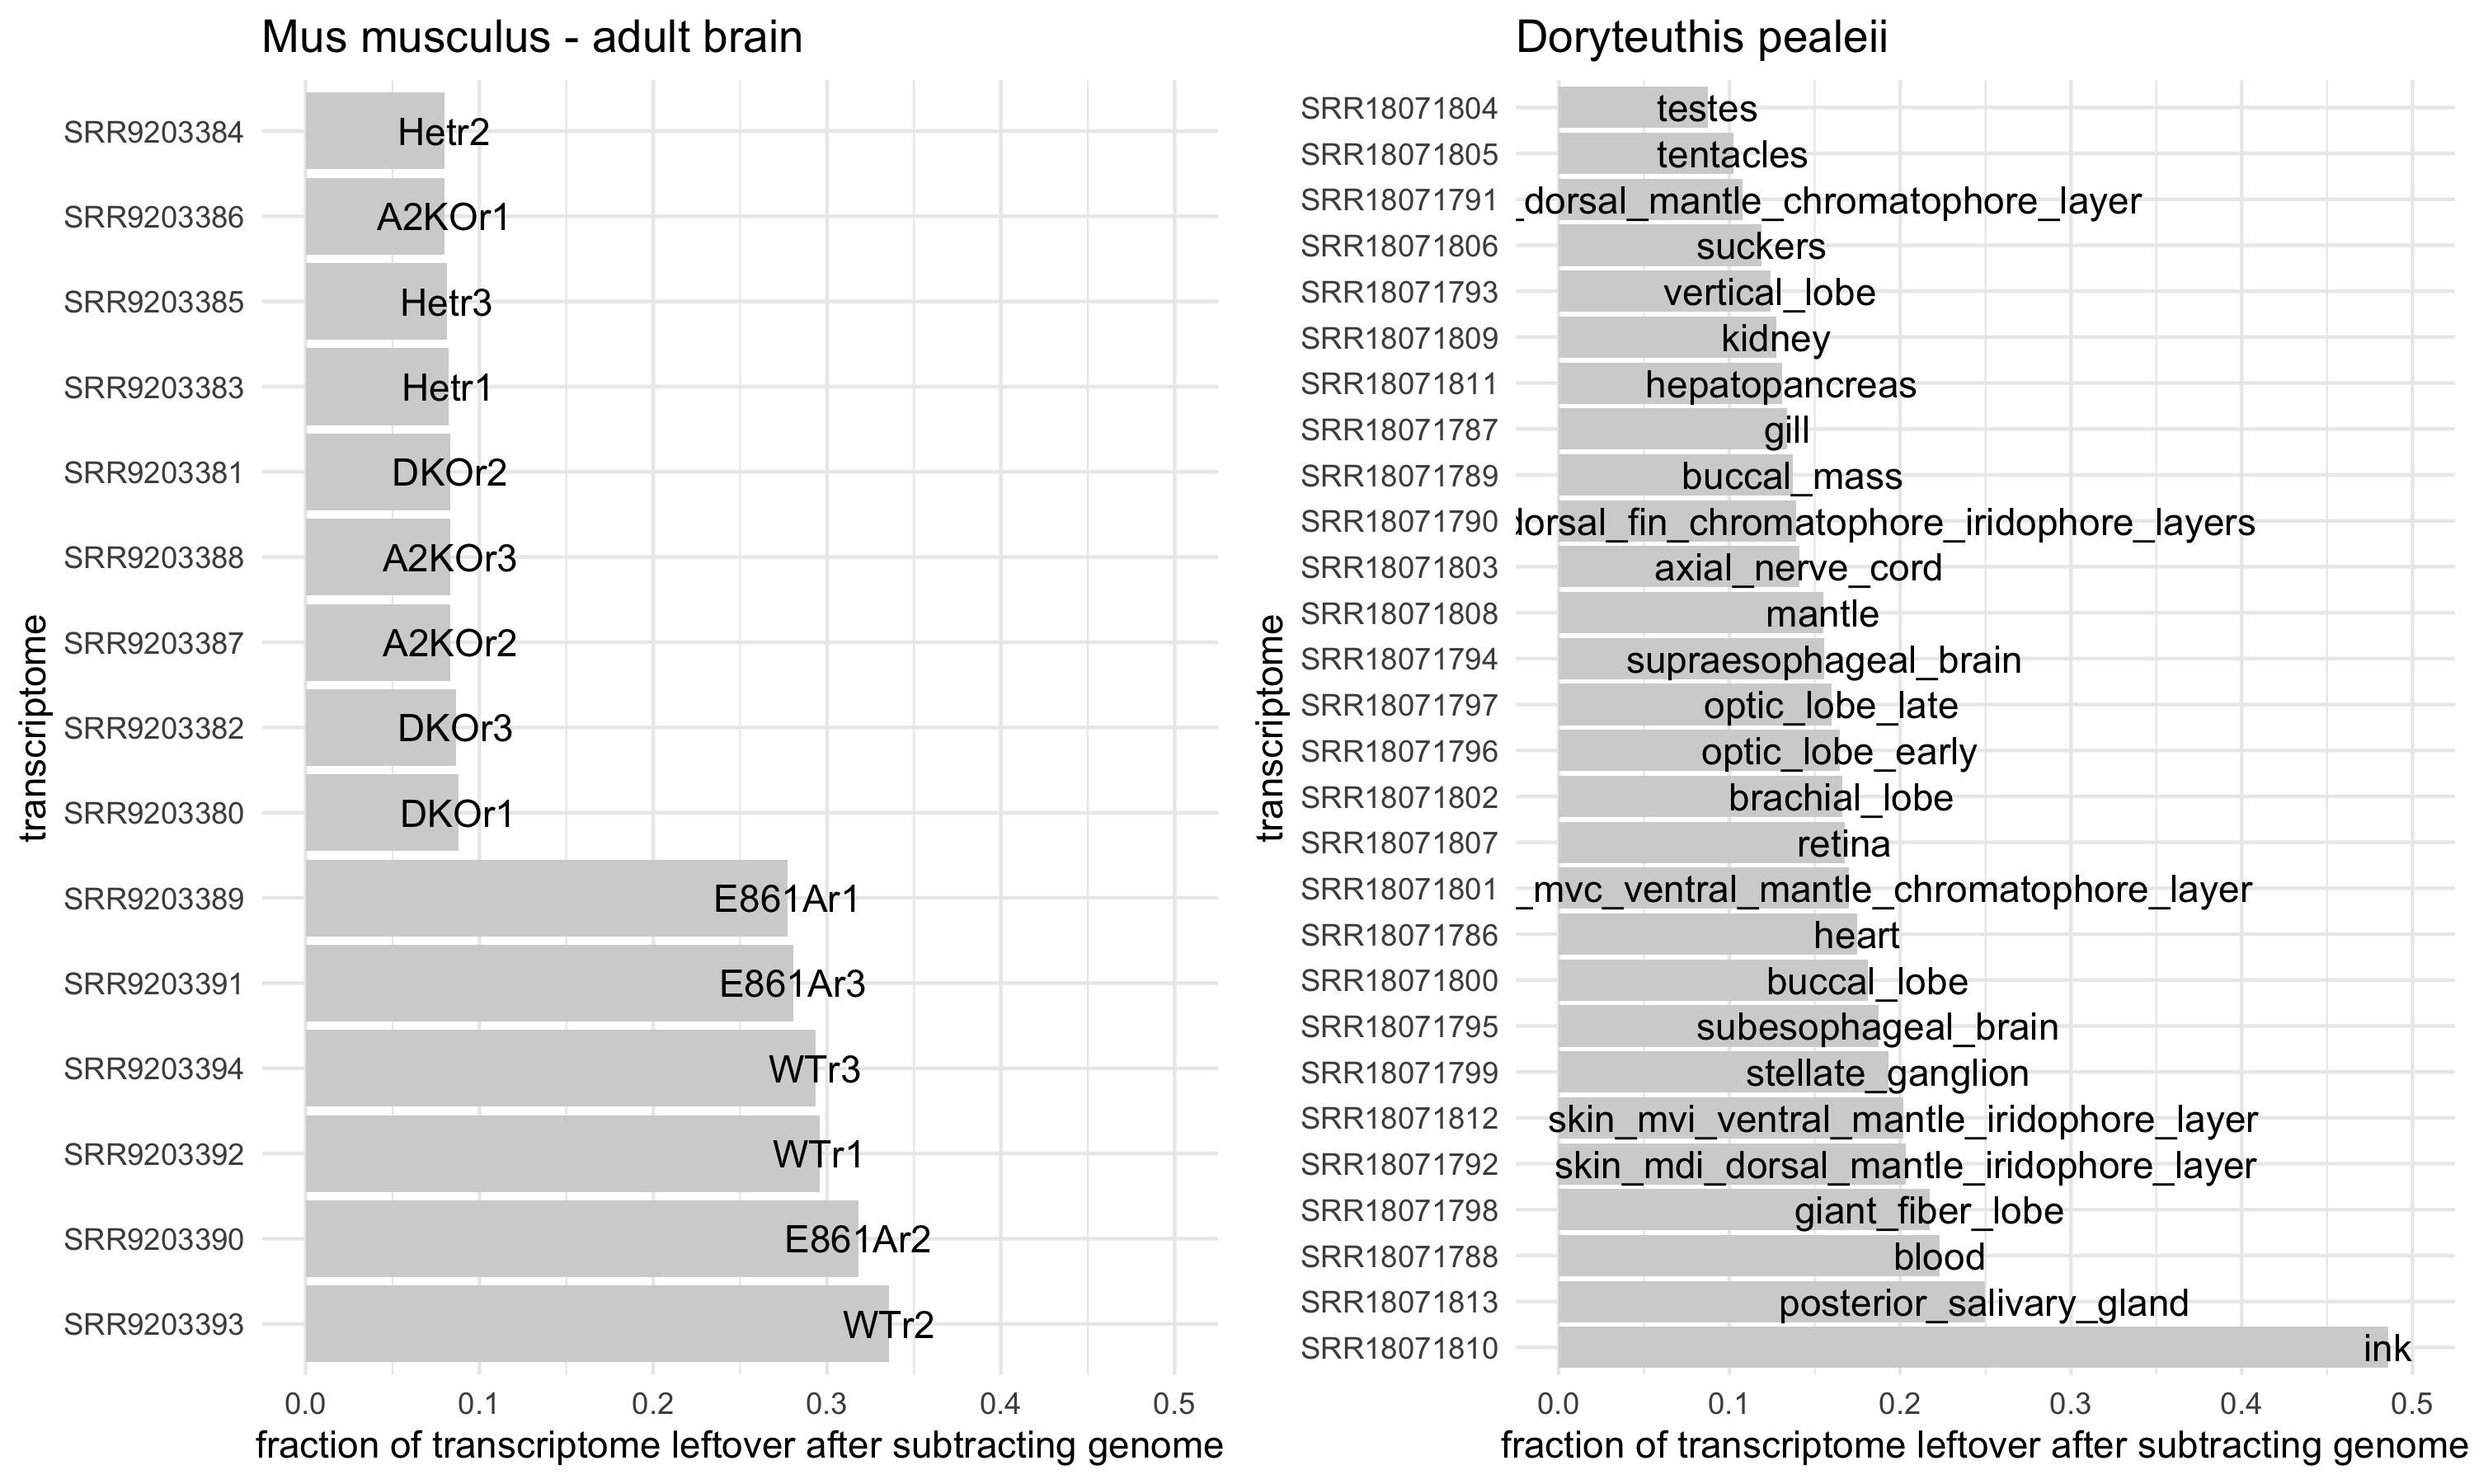

In [64]:
ggpubr::ggarrange(mus_plt, dory_plt)